# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


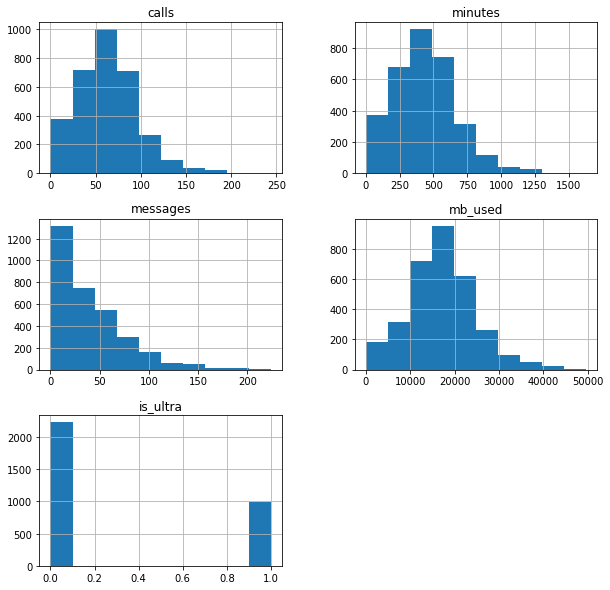

In [3]:
df.hist(figsize=(10,10));

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [6]:
for column in df:
    print(column, df[column].unique())

calls [ 40.  85.  77. 106.  66.  58.  57.  15.   7.  90.  82.  45.  51.  56.
 108.   6.   2.  26.  79.  49.  93.  48.  11.  53.  81. 154.  37.  50.
  41.  10.  71.  65. 110. 120.  76.  64.  23.  34.  98.  35.   5.  70.
 124. 129.  67.   0.  13.  68.  91. 121. 114. 125.  80.  33. 138.  84.
  78.  69.  63.  72.  73.   1.  43. 118.  74.  83. 141. 117.  54. 101.
  29.   3. 107.  55.  47. 158.  87.  28.  59.  52.  44.  17. 111. 109.
  14.  92.  94.  46. 133.  75.  38.  60. 100.  31.  61.  89.  27. 196.
  24.  99.  62. 162. 116. 123.  18.  21.  12.  86.  32.  95.  39.  30.
  25.  36.  42. 113.   9. 183. 156. 127.  96.  16.   4. 102.  97.  20.
 104. 144.  19. 132. 131. 136.  88. 115. 176. 160. 164. 169.  22. 105.
 152. 177. 161. 112.   8. 126. 178. 103. 130. 198. 119. 137. 150. 122.
 146. 151. 157. 203. 143. 148. 128. 185. 167. 181. 184. 171. 153. 140.
 159. 188. 134. 189. 182. 173. 172. 145. 180. 155. 174. 244. 165. 163.
 142. 168.]
minutes [311.9  516.75 467.66 ... 634.44 462.32 566.09]
mes

## Разбейте данные на выборки

In [7]:
features = df.drop(columns=['is_ultra'])
target = df['is_ultra']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, \
                                                                              random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(features_test, target_test, test_size=0.5, \
                                                                           random_state=12345)

print('Features_train:', features_train.shape)
print('Target_train:', target_train.shape)
print('Target_test:', target_test.shape)
print('Features_test:', features_test.shape)
print('Features_valid:', features_valid.shape)
print('Target_valid:', target_valid.shape)

Features_train: (1928, 4)
Target_train: (1928,)
Target_test: (643,)
Features_test: (643, 4)
Features_valid: (643, 4)
Target_valid: (643,)


В переменные features и target определим признаки и целевую функцию соответственно. Затем методом *train_test_split* разделим выборку на тренировочную, валидационную и тестовую выборки в соотношении 3:1:1

## Исследуйте модели

In [8]:
best_model = None
best_depth = 0
best_accuracy = 0
for depth in range(1, 301):
    model = DecisionTreeClassifier(max_depth=depth, criterion='gini', random_state=12345)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    accuracy = accuracy_score(predictions, target_valid)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_depth = depth
print('Best depth:', best_depth)
print('Best accuracy', best_accuracy)

Best depth: 3
Best accuracy 0.7853810264385692


В модели дерева наиболее точная модель - модель с глубиной 3, так как далее, вероятно, идет переобучение

In [9]:
best_model = None
best_depth = 0
best_accuracy = 0
best_est = 0
for depth in range(10, 301, 10):
    for est in range(1, 101):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        accuracy = accuracy_score(predictions, target_valid)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depth = depth
            best_model = model
            best_est = est
print('Best est:', est)
print('Best depth:', best_depth)
print('Best accuracy:', best_accuracy)

Best est: 100
Best depth: 10
Best accuracy: 0.7993779160186625


В модели случайного леса наиболее точные предсказания при параметре n_estimators=100, depth=10

In [10]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
accuracy = accuracy_score(predictions, target_valid)
print('Accuracy:', accuracy)

Accuracy: 0.7107309486780715


Моделью с наименее точными предсказаниями является модель логистической регрессии, результат: 0,7107

Таким образом выбираем модель случайного леса со следующими гиперпараметрами: n_estimators=100, max_depth=10

## Проверьте модель на тестовой выборке

In [11]:
model = RandomForestClassifier(random_state=12345, n_estimators=100, max_depth=10)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
accuracy = accuracy_score(predictions, target_test)
print('Accuracy:', accuracy)

Accuracy: 0.8055987558320373


На тестовой выборке модель показала больший процент правильных ответов, чем на валидационной

## (бонус) Проверьте модели на адекватность

In [12]:
dummy = DummyClassifier()
dummy.fit(features_train, target_train)
dummy_prediction = dummy.predict(features_test)
print(dummy.score(dummy_prediction, target_test))

0.6842923794712286


Проверим адекватность конечной модели с помощью DummyClassifier. Если score построенной нами модели больше, чем score SummyClassifier, то модель можно считать адекватной, что и получилось в нашем случае.

**Вывод:** 
<ol>
    <li>в ходе проекта было проведено исследование, в ходе которого перебирались разные модели машинного обучения (DecisionTreeClassifier, RandomForestClassifier, LogisticRegression) с различными гиперпараметрами (depth, n_estimators), в результате чего была выбрана оптимальная модель машинного обучения для задачи классификации, которой оказалась модель случайного леса. </li>
    <li>AccuracyScore обученной модели на валидационной выборке составила 0.79, в то время как на тестовой выборке 0.80.</li>
    <li>Также модель была проверена на адекватность с помощью метода DummyClassifier, в результате проверки было обосновано предположение об адекватности модели.</li>
</ol>